# Computational Finance Exercises

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Utility and Investments

In [2]:
def utility(er, a, sigma):
    u = er - 0.5*a*(sigma**2)
    return u

In [3]:
utility(0.05, 2, 0)

0.05

In [4]:
def expected_return(u, a, sigma):
    er = u + 0.5*a*(sigma**2)
    return er

In [5]:
expected_return(0.05, 2, 0.1)

0.060000000000000005

## Portfolio Return

In [6]:
def portfolio_return(weight, ret):
    port_ret = 0
    for i in range(len(weight)):
        port_ret += weight[i]*ret[i]
    return port_ret

In [7]:
weight = [0.5, 0.25, 0.25]
ret = [12, 10, 8]
portfolio_return(weight, ret)

10.5

## Simple calculation of covariance for two stocks

In [8]:
def covariance(a, b, ma, mb):
    w = 0
    for i in range(len(a)):
        w += ((a[i] - ma)*(b[i] - mb))
    return abs(w/(1-len(a)))

In [9]:
a = [1692, 1978, 1884, 2151, 2519]
b = [68, 102, 110, 112, 154]
ma = sum(a)/5
mb = sum(b)/5
q = covariance(a,b, ma, mb)
q

9107.3

## Portfolio Expected Return and Variance

In [22]:
weight = [0.6, 0.4] 
ret = [12, 20]
portfolio_return(weight, ret)

15.2

In [23]:
def two_assets_variance(w, std, corr):
    return (w[0]**2)*(std[0]**2)+(w[1]**2)*(std[1]**2)+2*w[0]*w[1]*std[0]*std[1]*corr

In [24]:
std = [0.16, 0.30]
corr = 0.5
var = two_assets_variance(weight, std, corr)
var

0.035136

In [25]:
def var_to_std(var):
    return np.sqrt(var)

In [26]:
var_to_std(var)

0.1874459922217597

In [27]:
def plot_change(ret, std, corr):
    x, y = [], []
    space = np.linspace(-0.0001, 1.0001, 50000)
    for i in space:
        x.append(var_to_std(two_assets_variance([1-i,i], std, corr)))
        y.append(portfolio_return([1-i,i], ret))
        
    l_x, l_y = x[0], y[0]
    for i, j in zip(x, y):
        if l_x < i or l_y > j:
            break
        else:
            l_x, l_y = i, j
        
    print("First asset 100%: Risk", x[0], ", Return", y[0])
    print("Second asset 100%: Risk", x[len(x)-1], ", Return", y[len(y)-1])
    print("Best point in terms of overall Risk and Return: Risk", l_x, ", Return", l_y)
    print("We are able to achieve this better result by diversifying between the two portfolios")
    print("")
    plt.xlim([0,0.4])
    plt.ylim([0,40])
    plt.plot(x, y)
    plt.xlabel("Standard Deviation of portfolio")
    plt.ylabel("Expected Portfolio Return")
    plt.title("Portfolio return and risk for a two assets portfolio")

First asset 100%: Risk 0.1600010021093618 , Return 11.9992
Second asset 100%: Risk 0.3000220003199765 , Return 20.000799999999998
Best point in terms of overall Risk and Return: Risk 0.15988161300881867 , Return 12.189321818436369
We are able to achieve this better result by diversifying between the two portfolios



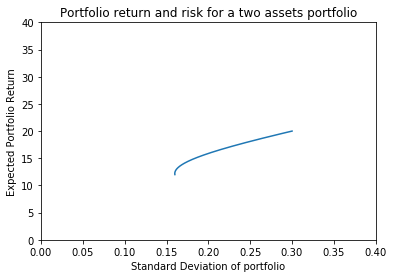

In [28]:
plot_change(ret, std, corr)

In [105]:
def covariance_impact(w, ret, std, corr):
    l_x, l_y = [], []
    #space = np.linspace(-0.0001, 100.0001, 50000)
    for j in corr:
        x, y = [], []
        for i in w:
            x.append(var_to_std(two_assets_variance([i,100-i], std, j)))
            y.append(portfolio_return([i,100-i], ret))
        #print(x)
        l_x.append(x)
        l_y.append(y)
    
    for i in range(len(l_x)):
        plt.plot(l_x[i], l_y[i],label=str(corr[i]))
        
    plt.xlim([0,40])
    plt.ylim([0,25])
    plt.plot(x, y)
    plt.xlabel("Standard Deviation of portfolio")
    plt.ylabel("Expected Portfolio Return")
    plt.title("Impact of correlation on portfolio risk with changing weights of assets")
    plt.legend()
    plt.show()

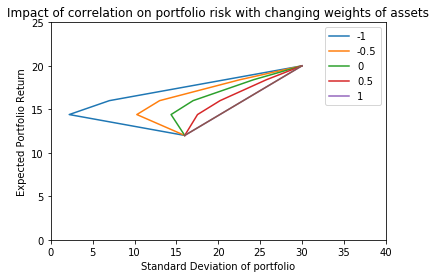

In [106]:
single_asset_varying_weight = [0, 20, 50, 70, 100]
corr = [-1, -0.5, 0, 0.5, 1]
ret = [0.12, 0.20]
std = [0.16, 0.30]
covariance_impact(single_asset_varying_weight, ret, std, corr)

## Capital Asset Pricing Model

In [161]:
def expected_return(rf, b, e):
    er = rf + b*(e-rf)
    return er

In [162]:
expected_return(0.03, 1.3, 0.08)

0.095

## CAPM Company Expected Returns

In [163]:
def beta(market_correlation, returns_deviation, market_deviation):
    b = (market_correlation*returns_deviation)/market_deviation
    return b

In [164]:
expected_return(0.03, beta(0.6, 0.25, 0.2), 0.1)

0.08249999999999999